# Approximate Nearest Neighbors:

# Image Recommendation System via Collaborative Filtering

# ***Please read the instructions very carefully***
This is a modified version of the previous question and requires you to use an artificial nearest neighbors library

We suggest you to use one of the following:
- [ScaNN](https://github.com/google-research/google-research/tree/master/scann)
- [FAISS](https://github.com/facebookresearch/faiss)
- [Annoy](https://github.com/spotify/annoy.git)

1.   Assignment must be implemented in Python 3 only.
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for evaluation metrics, data visualization (matplotlib etc.).
3.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
4.   ⚠️ The Assignment will be evaluated automatically. Please adhere to taking proper inputs from `config.csv` file. You can change your `config.csv` file to experiment with your code. But at the end, make sure that your outputs are corresponding to input values in `config.csv`
5.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

## About the Dataset
Behance is a community art website where users showcase and discover creative work. Each user is able to “appreciate” (equivalent to a “like” on Instagram or a “react” on Facebook) an image, indicating that they like the image. It is in the website’s best interests to show users pictures that they would like, to keep them engaged for longer. For this question, given a set of pictures that a user has already appreciated, you have to show them a new picture that they would like based on what similar users appreciated.


<br><br>
**The dataset has information of 1 million appreciates of 63,497 users on 178,788 items. The file Behance appreciate 1M has a triplet in each line in the form of (user id, item id, unix timestamp).**

**Task: Take the inputs from the config.csv file and output the recommendations for a particular person**
- Collaborative Filtering is a way to predict items to the user based on the the
user’s history and the history of similar users. The similarity between users can be quantified by the number of images that both the users appreciated.
- The images appreciated by a similar user would be the most suitable images to show a user. Since we can find the similarity between any two users, we would be able to find the “nearest” neighbours of any user, allowing us to use a KNN-based algorithm to recommend new images to a user.
- Since people do not like seeing pictures that they have seen already. Make sure that you do not recommend pictures that a user has appreciated already.
- Output the final response will be saved in the file named ```config['output_file']```.


**Output file format:**
Populate the output file with images that the user has not seen of the k most
similar users, in descending order of their similarity. Each line in the output
file should be a duplet in the form of (item id, user id), where the user id is the
id of the kth similar user. The order of the images corresponding to the same
similar user would not matter. The output file would look something like this:
```
item_id_1_of_1st_similar_user 1st_most_similar_user_id
item_id_2_of_1st_similar_user 1st_most_similar_user_id
item_id_3_of_1st_similar_user 1st_most_similar_user_id
...
item_id_1_of_2nd_similar_user 2nd_most_similar_user_id
item_id_2_of_2nd_similar_user 2nd_most_similar_user_id
item_id_3_of_2nd_similar_user 2nd_most_similar_user_id
...
item_id_1_of_kth_similar_user kth_most_similar_user_id
item_id_2_of_kth_similar_user kth_most_similar_user_id
item_id_3_of_kth_similar_user kth_most_similar_user_id
```

You may use any other recommendation system that you wish to use. However,
evaluation script will score your submission by measuring the similarity between
users with the number of common images they appreciated.
The dataset was extracted using Behance’s API as a part of the paper
“Vista: A visually, socially, and temporally-aware model for artistic
recommendation, RecSys, 2016”. Check out this [Google Drive folder](https://drive.google.com/drive/folders/0B9Ck8jw-TZUEc3NlMjVXdDlPU1k?resourcekey=0-6_8ykn0o4fLc5fuTEm91xA) for
more information about the dataset.


Have fun! The users are waiting to see new pictures!

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
import math

In [2]:
!pip install scann

     |████████████████████████████████| 10.6 MB 6.8 MB/s 


In [3]:
import scann

In [4]:
# Config Generation Sample Code.
# ⚠️ Only for experimentation on your side.
# ⚠️ Should be commented during submission.

# df = pd.DataFrame(data=[{'id':276633,
#                   'k':5,
#                   'dataset_file':'./Behance_appreciate_1M',
#                   'output_file':'./output.txt'}])
# df.to_csv('config.csv')

In [5]:
config = pd.read_csv('config.csv').iloc[0]

In [6]:
config

Unnamed: 0                            0
id                               276633
k                                     5
dataset_file    ./Behance_appreciate_1M
output_file                ./output.txt
Name: 0, dtype: object

In [7]:
user = config['id']
k_value = config['k']

### Read the Data

In [8]:
with open(config['dataset_file'], 'r') as inFile:
    appreciate_data = inFile.readlines()

In [9]:
# your code here
# del config

### Initialize a dictionary to store the item_ids that a user likes

### Go through each line of the input file and construct the user_likes dictionary

In [10]:
user_likes = dict()
dis_image = set()
# index = dict()

In [11]:
for line in appreciate_data:
    line = line.strip()
    
    user_id = int(line.split()[0])
    item_id = int(line.split()[1])

    if user_id not in user_likes:
        user_likes[user_id] = list()
    
    user_likes[user_id].append(item_id)
    dis_image.add(item_id)

In [12]:
# sp_matrix.shape

In [13]:
user_index=dict()
image_index=dict()
count=0
for u in user_likes.keys():
  user_index[u]=count
  count+=1
count=0
for image in dis_image:
  image_index[image]=count
  count+=1


In [14]:
row=list()
colunm=list()
data=list()

In [15]:
for u,images in user_likes.items():
  for image in images:
    data.append(1)
    row.append(user_index[u])
    colunm.append(image_index[image])

In [16]:
sp_matrix=csr_matrix((data,(row,colunm)))

In [17]:
svd = TruncatedSVD(n_components=1000, random_state=17)

In [ ]:
sp_matrix=svd.fit_transform(sp_matrix)

In [ ]:
index_user=dict()
for u,i in user_index.items():
  index_user[i]=u

In [ ]:
sp_matrix = sp_matrix / np.linalg.norm(sp_matrix, axis=1)[:, np.newaxis]


In [ ]:
searcher = scann.scann_ops_pybind.builder(sp_matrix , 10, "dot_product").tree(
    num_leaves=math.ceil(math.sqrt(len(user_index))), num_leaves_to_search=100, training_sample_size=len(user_index)).score_ah(
    2, anisotropic_quantization_threshold=0.2).reorder(100).build()

### Use your choice of Approximate Nearest Neigbor after Collaborative Filtering to find nearest neighbors

In [ ]:
# your code here
def neighbors(user,k_value):
    """ returns an iterable object (like list or generator) """
    neighbors, distances = searcher.search(sp_matrix[user_index[user]] , final_num_neighbors=k_value + 21)
    ans=[index_user[x] for x in neighbors]
    print(ans)
    return ans


### Answer the following questions:

#### Q1. **Explain how your choice of library works**

ScaNN is a method for efficient vector similarity search at scale. Like any other algorithms Training set and the test set are linked to common embedding. here we try to find out similarity on the basis of semantic understanding rather than simple indexable properties.<br>
ScaNN algorithm works on MIPS (Maximum Inner Product sum) to find similarities between query vector and the vectors in model.<br>
Since data is in billions or millions MIPS often becomes computational bottleneck to infer speed , and ehaustive approach becomes imprcitcal. To speed up our proceess we will aprrox MIPS. 
We Quantize vectors in order to do that. Quatization is done basis of below:-<br>

Earlier it was thought that the average distance between quantized vector x1 and x should be less to get better MIPS but in this algorithm we are going to keep average distance higher.<br>
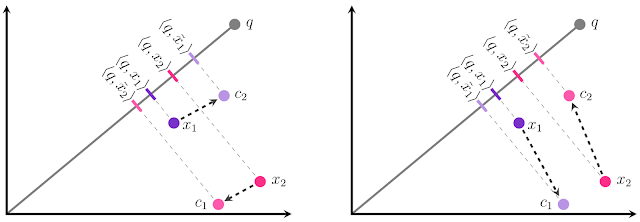 
<br>
<br>
above image is from : https://ai.googleblog.com/2020/07/announcing-scann-efficient-vector.html
<br>Here x1 and x2 needed to be quantized to c1 and c2. As you can see in above that if x1 is quantized to c2 and x1 is quantized to c1 then ans won't be accurate as q,x1 is less than q,x2 but after quantization q.c2 is greater than q,c1. Therefore taking higher average distance beteen quantized vector was good.<br>

Direction of also matters so the moe othogonaal is the quantized vector the more optimized vector we will get and more parallel the quantization ,less accurate ans will be.<br>
Anisotropic vector quantization technique states  heavily penalize quantization error that is parallel to the original vector.<br>

ScaNN is splited in 3 phases:-<br>
1. Partition: The ScaNN algorithm patitions train set into partitions during training if partition is enabled and at query time passes top partitions.

2. Scoring: If partition is enabled the distance query is calculated from
points in the partition else distance is calculated from all points in training set. this distances are not exact.

3. Rescoring: It is optional phase. ScaNN takes k' distances from score phase and calculate exact distance. then top k distances are selected.


#### Q2. **Compare your choice of library with vanilla KNN.**
***Hint: Include Time Complexity, and explain the tradeoff with recall***

The vanilaa knn built by me uses brute force algorithm so time complexity is O(nd) while Scann takes little more time time in training but but at query time it is quite fast. ScaNN beats best algorithm by twice rate of query resolution

#### Q3. **Compare your choice of library with implementation of ScaNN, faiss and annoy.**
***Hint: Include Time Complexity, and explain the tradeoff with recall***
<br> I have chosen scaNN because of below graphs<br>
<br>graphs are taken from:http://ann-benchmarks.com/glove-25-angular_10_angular.html<br>

*your solution here*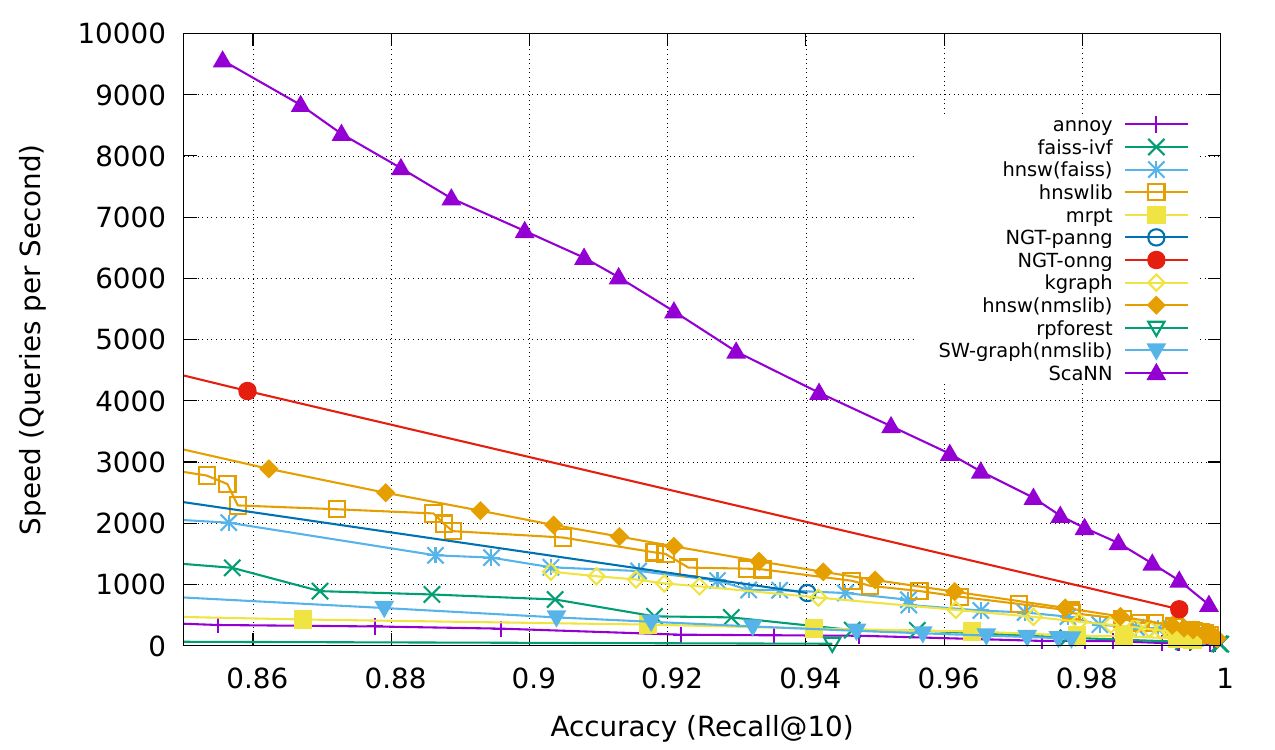

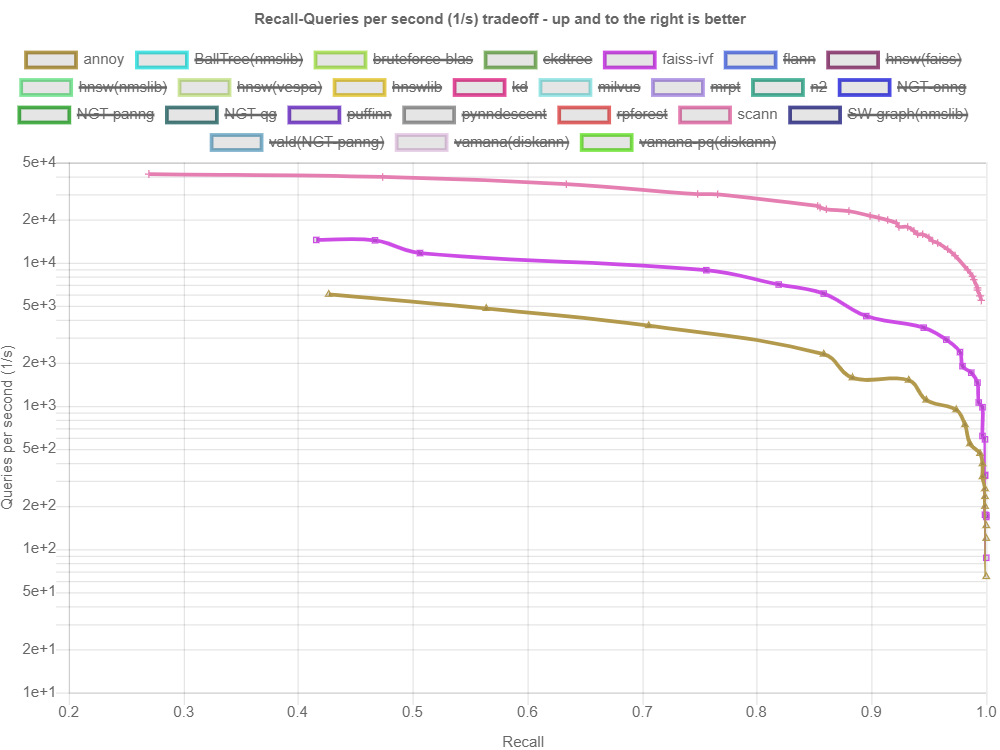

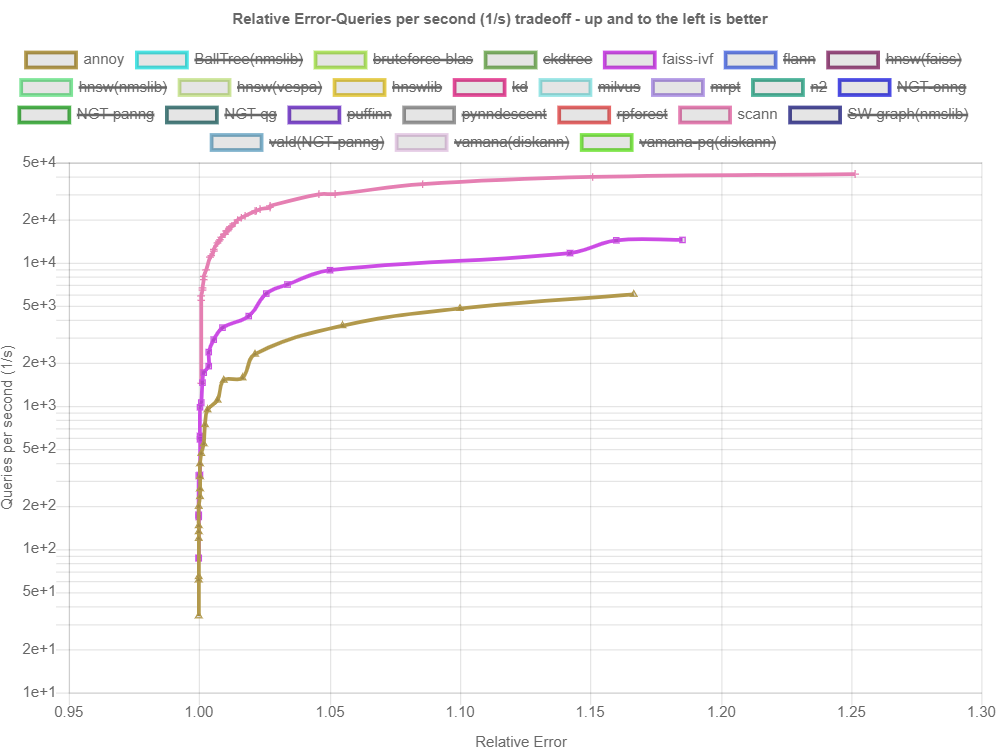

### Open the output file to write all the lines to the file

In [ ]:
def is_subset(recom,user_list):
  return len(recom) == len(set(recom) & set(user_list))

In [ ]:
outFile = open(config['output_file'], 'w')
ans1 = neighbors(user,k_value)
count=0
for n_user in ans1:
    # user_id = list(user_likes.keys())[n_user]
    if n_user == user:
      continue
    user_id=n_user
    if count == k_value:
      break
    if is_subset(user_likes[n_user],user_likes[user]):
      continue
    print(n_user)
    count+=1
    for item_id in user_likes[user_id]:
      if item_id not in user_likes[user]:
        outFile.write(str(item_id) + ' ' + str(user_id) + '\n')

outFile.close()